# Exploratory Data Analysis (EDA) for Sales Funnel Data  

## 📌 Overview  
This EDA aims to analyze the **Top-of-Funnel to Deal** conversion process, uncover key patterns, and identify areas for optimization. The dataset includes lead details, funnel stages, and revenue impact.  

## 🔍 Analysis Approach  
### 1️⃣ Data Cleaning & Preprocessing  
- Handle **missing values**, **duplicates**, and **data type inconsistencies**  
- Identify **outliers** in ARR, employee count, and conversion times  

### 2️⃣ Key Insights & Trends  
#### 📈 Lead Volume & Growth Trends  
- Analyze **lead acquisition trends** over time (Inbound vs. Outbound)  
- **Charts:** Time Series, Lead Source Breakdown  

#### 🔄 Funnel Performance & Conversion Rates  
- Track **Signup → MQL → Demo → Paid** conversion rates  
- Identify **bottlenecks** and **average time per stage**  
- **Charts:** Funnel Chart, Box Plot (Conversion Time), Cohort Analysis  

#### 🏢 Industry & Company Size Breakdown  
- Identify **top-performing industries** and their conversion rates  
- Measure impact of **company size on conversions**  
- **Charts:** Industry vs. Conversion Rate, Employee Count Breakdown  

#### 💰 ARR & Revenue Impact  
- Analyze **ARR distribution** across segments  
- Identify relationship between **deal size and conversion time**  
- **Charts:** Histogram (ARR Distribution), Scatter Plot (ARR vs. Conversion Time)  

#### 🌍 Regional Performance  
- Compare **lead volume & conversion rates by country/region**  
- Assess **regional differences in sales cycles**  
- **Charts:** Heatmap (Leads & Conversions), Region vs. Conversion Rate  


## 🚀 Next Steps  
- Implement SQL queries for deeper insights  
- Build interactive Tableau/ Hubspot dashboards for real-time monitoring  

---

### 1️⃣ Data Cleaning & Preprocessing  


In [193]:
import pandas as pd
import numpy as np
import re
import shutil  # For file copying
from googletrans import Translator
from deep_translator import GoogleTranslator
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
tf= pd.read_csv('Connecteam_Bizops_HA_ 2025.csv')
tf

,Company number,Job Title,Industry,Main Company Interest,Country,Country Region,Channel Group (Inbound),Device Category,Num of Employees,Signup Timestamp Date,Conversion to Mql Timestamp Date,First Demo Date Date,Conversion to Paid Timestamp Date,Arr At Conversion
0,1,Owner,foodBeverages,scheduling,United States of America,NorthAmerica,cpc-Bingpaid,PC,20,14/06/2024,14/06/2024,NaN,NaN,NaN
1,2,xb,retail,taskManagement,Afghanistan,ArabStates,mobile,Mobile,"3,000",14/06/2024,NaN,NaN,NaN,NaN
2,3,Foreman,construction,general,Australia,APAC,cpc-google_pmax,Mobile,20,14/06/2024,15/06/2024,NaN,NaN,NaN
3,4,nxn,retail,taskManagement,Afghanistan,ArabStates,mobile,Mobile,"3,000",14/06/2024,NaN,NaN,NaN,NaN
4,5,vbb,retail,taskManagement,Afghanistan,ArabStates,mobile,Mobile,"3,000",14/06/2024,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,3902,Saw guy,construction,general,United States of America,NorthAmerica,mobile,Mobile,20,01/06/2024,NaN,NaN,NaN,NaN
3902,3903,APR Coordinator,religious,schedule,United States of America,NorthAmerica,mobile,Mobile,20,01/06/2024,NaN,NaN,NaN,NaN
3903,3904,Operations Manager,foodBeverages,scheduling,United Kingdom,Europe,cpc-Bingpaid,PC,40,01/06/2024,NaN,NaN,NaN,NaN
3904,3905,HUMAN RESOURCES,other,general,Nigeria,Africa,organic,PC,350,01/06/2024,01/06/2024,NaN,NaN,NaN


In [194]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Company number                      3906 non-null   int64 
 1    Job Title                          3896 non-null   object
 2    Industry                           3905 non-null   object
 3    Main Company Interest              3905 non-null   object
 4    Country                            3906 non-null   object
 5   Country Region                      3906 non-null   object
 6   Channel Group (Inbound)             3834 non-null   object
 7   Device Category                     3906 non-null   object
 8    Num of Employees                   3905 non-null   object
 9    Signup Timestamp Date              3906 non-null   object
 10   Conversion to Mql Timestamp Date   1302 non-null   object
 11   First Demo Date Date               392 non-null    obje

In [195]:
tf.isnull().sum()

Company number                           0
 Job Title                              10
 Industry                                1
 Main Company Interest                   1
 Country                                 0
Country Region                           0
Channel Group (Inbound)                 72
Device Category                          0
 Num of Employees                        1
 Signup Timestamp Date                   0
 Conversion to Mql Timestamp Date     2604
 First Demo Date Date                 3514
 Conversion to Paid Timestamp Date    3450
 Arr At Conversion                    3451
dtype: int64

In [196]:
tf.duplicated().sum()

np.int64(0)

**No Duplicates found.**

# **Fake Lead Filtering Script**

## **Overview**  
This script identifies and removes fake leads from a sales dataset based on specific criteria. It saves cleaned data and fake leads separately.  

## **Process**  

### **1. Load and Backup Data**  
- Reads the CSV file into a Pandas DataFrame.  
- Creates a backup copy of the original file.  

### **2. Define Fake Lead Conditions**  
A lead is considered **fake** if:  
- **Country is Afghanistan**  
- **Job title has repeated characters** (e.g., "AAAA CEO")  
- **Job title contains unusual symbols**  
- **Missing key timestamps** (e.g., demo or paid date)  
- **Not in the "Keep Titles" list** (e.g., CEO, HR, CTO)  

### **3. Filter and Save Data**  
- Separates fake and valid leads.  
- Translates job titles for valid leads if needed.  
- Saves results into `fake_leads.csv` and `cleaned_sales_data.csv`.  

## **Purpose**  
- Improves data quality for analysis.  
- Automates lead validation.  
- Saves time and reduces manual filtering.  

In [197]:
# Define file paths
original_file = "/Users/teitelbaumsair/Desktop/Open-Source-Projects/Connecteam BOM Assignment/Connecteam_Bizops_HA_ 2025.csv"
backup_file = "Connecteam_Bizops_HA_2025_backup.csv"
cleaned_file = "cleaned_sales_data.csv"
fake_leads_file = "fake_leads.csv"

# Create a backup of the original file
shutil.copy(original_file, backup_file)
print(f"Backup created: {backup_file}")

# Load the data
df = pd.read_csv(original_file)

# Strip column names of any whitespace
df.columns = df.columns.str.strip()

# List of important job titles to KEEP
keep_titles = ["VP", "CEO", "CTO", "CFO", "COO", "Founder", "Owner", "HR", "CRO"]

# Function to detect fake leads
def is_fake_lead(df):
    # Conditions for fake leads
    is_from_afghanistan = df["Country"].str.strip().str.lower() == "afghanistan"
    
    # Detect repeating characters (e.g., "xxx", "aaa")
    repeating_chars = df["Job Title"].str.contains(r"(.)\1{2,}", regex=True, na=False)
    
    # Detect weird symbols (excluding common ones like dots, slashes, and dashes)
    weird_symbols = df["Job Title"].str.contains(r"[^a-zA-Z\s\.\-/]", regex=True, na=False)
    
    # Check if any of the columns contain conversion-related dates
    has_conversion_date = df["Conversion to Mql Timestamp Date"].notna()
    has_demo_date = df["First Demo Date Date"].notna()
    has_paid_date = df["Conversion to Paid Timestamp Date"].notna()
    has_arrival_date = df["Arr At Conversion"].notna()

    # Check if job title is in the 'keep_titles' list
    is_keep_title = df["Job Title"].str.strip().str.upper().isin([title.upper() for title in keep_titles])
    
    # Combine all conditions for fake leads
    fake_leads_condition = (
        (is_from_afghanistan | repeating_chars | weird_symbols) & 
        ~(
            has_conversion_date | has_demo_date | has_paid_date | has_arrival_date | is_keep_title
        )
    )
    
    return fake_leads_condition

# Identify fake leads
fake_leads_condition = is_fake_lead(df)
fake_leads = df[fake_leads_condition]
valid_leads = df[~fake_leads_condition]

# Save fake leads and cleaned leads to separate files
fake_leads.to_csv(fake_leads_file, index=False)
valid_leads.to_csv(cleaned_file, index=False)

print(f"Fake leads saved to: {fake_leads_file}")
print(f"Cleaned data saved as: {cleaned_file}")

Backup created: Connecteam_Bizops_HA_2025_backup.csv
Fake leads saved to: fake_leads.csv
Cleaned data saved as: cleaned_sales_data.csv


# **📊 Deep Dive Analysis on Cleaned Sales Data**  

## **Objective**  
Now that we have cleaned the sales data, we will conduct an in-depth analysis to uncover key trends, segment performance, and revenue insights.  

## **Analysis Breakdown**  

### **📈 Lead Volume & Growth Trends**  
- Track **lead acquisition trends** over time, differentiating between Inbound vs. Outbound.  
- **Charts:** Time Series Analysis, Lead Source Breakdown.  

### **🔄 Funnel Performance & Conversion Rates**  
- Analyze **conversion rates** across the stages: **Signup → MQL → Demo → Paid**.  
- Identify **bottlenecks** and measure **average time per stage**.  
- **Charts:** Funnel Chart, Box Plot (Conversion Time), Cohort Analysis.  

### **🏢 Industry & Company Size Breakdown**  
- Identify **top-performing industries** and their conversion rates.  
- Analyze how **company size** impacts lead conversion.  
- **Charts:** Industry vs. Conversion Rate, Employee Count Breakdown.  

### **💰 ARR & Revenue Impact**  
- Examine **ARR distribution** across lead segments.  
- Detect correlation between **deal size and conversion time**.  
- **Charts:** Histogram (ARR Distribution), Scatter Plot (ARR vs. Conversion Time).  

### **🌍 Regional Performance**  
- Compare **lead volume and conversion rates** across different countries/regions.  
- Assess **regional variations in sales cycles**.  
- **Charts:** Heatmap (Leads & Conversions), Region vs. Conversion Rate.  

## **📊 Additional Insights for Business Operations**  
To further optimize performance, consider analyzing:  
- **Marketing Source & Lead Score** → Assess acquisition efficiency.  
- **Sales Rep Assignment & Follow-Up Cadence** → Improve sales team effectiveness.  
- **Feature Usage & Churn Rate** → Enhance retention & customer success.  

🚀 *This analysis will help drive data-driven decision-making and refine sales strategies!*  

In [198]:
cd = pd.read_csv("/Users/teitelbaumsair/Desktop/Open-Source-Projects/Connecteam BOM Assignment/cleaned_sales_data.csv")
cd

,Company number,Job Title,Industry,Main Company Interest,Country,Country Region,Channel Group (Inbound),Device Category,Num of Employees,Signup Timestamp Date,Conversion to Mql Timestamp Date,First Demo Date Date,Conversion to Paid Timestamp Date,Arr At Conversion
0,1,Owner,foodBeverages,scheduling,United States of America,NorthAmerica,cpc-Bingpaid,PC,20,14/06/2024,14/06/2024,NaN,NaN,NaN
1,3,Foreman,construction,general,Australia,APAC,cpc-google_pmax,Mobile,20,14/06/2024,15/06/2024,NaN,NaN,NaN
2,6,QA Manager,manufacturing,checklists,Mexico,NorthAmerica,cpc-google,PC,"3,000",14/06/2024,14/06/2024,NaN,NaN,NaN
3,7,Manager,foodBeverages,scheduling,Canada,NorthAmerica,cpc-google,PC,20,14/06/2024,14/06/2024,NaN,28/06/2024,"1,128"
4,9,Auto electrician,fieldServices,general,South Africa,Africa,mobile,Mobile,75,14/06/2024,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,3902,Saw guy,construction,general,United States of America,NorthAmerica,mobile,Mobile,20,01/06/2024,NaN,NaN,NaN,NaN
3599,3903,APR Coordinator,religious,schedule,United States of America,NorthAmerica,mobile,Mobile,20,01/06/2024,NaN,NaN,NaN,NaN
3600,3904,Operations Manager,foodBeverages,scheduling,United Kingdom,Europe,cpc-Bingpaid,PC,40,01/06/2024,NaN,NaN,NaN,NaN
3601,3905,HUMAN RESOURCES,other,general,Nigeria,Africa,organic,PC,350,01/06/2024,01/06/2024,NaN,NaN,NaN


Remove rows that contain test leads.

In [199]:
# Drop rows where any column contains the word "test"
data_cleaned = cd[~cd.apply(lambda row: row.astype(str).str.contains('test', case=False).any(), axis=1)]

# Verify the first few rows of the cleaned data
data_cleaned.head()

,Company number,Job Title,Industry,Main Company Interest,Country,Country Region,Channel Group (Inbound),Device Category,Num of Employees,Signup Timestamp Date,Conversion to Mql Timestamp Date,First Demo Date Date,Conversion to Paid Timestamp Date,Arr At Conversion
0,1,Owner,foodBeverages,scheduling,United States of America,NorthAmerica,cpc-Bingpaid,PC,20,14/06/2024,14/06/2024,NaN,NaN,NaN
1,3,Foreman,construction,general,Australia,APAC,cpc-google_pmax,Mobile,20,14/06/2024,15/06/2024,NaN,NaN,NaN
2,6,QA Manager,manufacturing,checklists,Mexico,NorthAmerica,cpc-google,PC,"3,000",14/06/2024,14/06/2024,NaN,NaN,NaN
3,7,Manager,foodBeverages,scheduling,Canada,NorthAmerica,cpc-google,PC,20,14/06/2024,14/06/2024,NaN,28/06/2024,"1,128"
4,9,Auto electrician,fieldServices,general,South Africa,Africa,mobile,Mobile,75,14/06/2024,NaN,NaN,NaN,NaN


In [200]:
# Rename Timestamp Columns
data_cleaned = data_cleaned.rename(columns={
    'Signup Timestamp Date': 'Date turned New',
    'Conversion to Mql Timestamp Date': 'Date turned MQL',
    'First Demo Date Date': 'Date turned Meeting Scheduled/Demo',
    'Conversion to Paid Timestamp Date': 'Date turned SQL'
})

# Verify the changes
data_cleaned.head()

,Company number,Job Title,Industry,Main Company Interest,Country,Country Region,Channel Group (Inbound),Device Category,Num of Employees,Date turned New,Date turned MQL,Date turned Meeting Scheduled/Demo,Date turned SQL,Arr At Conversion
0,1,Owner,foodBeverages,scheduling,United States of America,NorthAmerica,cpc-Bingpaid,PC,20,14/06/2024,14/06/2024,NaN,NaN,NaN
1,3,Foreman,construction,general,Australia,APAC,cpc-google_pmax,Mobile,20,14/06/2024,15/06/2024,NaN,NaN,NaN
2,6,QA Manager,manufacturing,checklists,Mexico,NorthAmerica,cpc-google,PC,"3,000",14/06/2024,14/06/2024,NaN,NaN,NaN
3,7,Manager,foodBeverages,scheduling,Canada,NorthAmerica,cpc-google,PC,20,14/06/2024,14/06/2024,NaN,28/06/2024,"1,128"
4,9,Auto electrician,fieldServices,general,South Africa,Africa,mobile,Mobile,75,14/06/2024,NaN,NaN,NaN,NaN


### **📈 Lead Volume & Growth Trends**  
- Track **lead acquisition trends** over time, differentiating between Inbound vs. Outbound.  
- **Charts:** Time Series Analysis, Lead Source Breakdown.  


In [201]:
def categorize_lead_type(channel_group):
    # Define mapping of Channel Group (Inbound) to Lead Type Category
    mapping = {
        'Organic Traffic': ['organic'],
        'Direct Traffic': ['direct'],
        'Paid Search': [
            'cpc-bing', 'cpc-Bingpaid', 'cpc-Bingpaid_brand', 'cpc-businesscom', 
            'cpc-capterra.com', 'cpc-elearningindustry', 'cpc-google', 'cpc-google_brand', 
            'cpc-google_il', 'cpc-google_il_brand', 'cpc-google_pmax', 'cpc-google_sd_rmkt', 
            'cpc-mvf', 'cpc-pmp', 'cpc-saasworthy', 'cpc-selectsoftwarereviews', 
            'cpc-sourceforge', 'cpc-TechnologyAdvice', 'cpc-TikTok'
        ],
        'Paid Social': ['social'],
        'Blank (Possibly Outbound)': ['', 'Null'],  # Empty or Null values
        'Uncategorized': ['uncategorized'],
        'Email': ['email'],
        'Phone': ['mobile'],
        'LinkedIn Sales Navigator': ['insite'],  # Assuming "insite" refers to LinkedIn Sales Navigator
        'Salesloft/ Apollo': [],  # Not in provided list, will default to 'Uncategorized' if missing
        'Influencers': ['influencers'],
        'Partnerships': ['partnerships-marketingpartners', 'partnerships-partnerstack'],
        'Referral': ['referral']
    }
    
    # Loop through the mapping and return the category
    for category, sources in mapping.items():
        if str(channel_group).lower() in [s.lower() for s in sources]:
            return category
    return 'Uncategorized'  # Default to Uncategorized if no match is found

# Apply the function to the 'Channel Group (Inbound)' column
data_cleaned['Lead Type Category'] = data_cleaned['Channel Group (Inbound)'].apply(categorize_lead_type)

# Check results
data_cleaned[['Channel Group (Inbound)', 'Lead Type Category']].head()

,Channel Group (Inbound),Lead Type Category
0,cpc-Bingpaid,Paid Search
1,cpc-google_pmax,Paid Search
2,cpc-google,Paid Search
3,cpc-google,Paid Search
4,mobile,Phone


In [202]:
# Ensure date columns are in datetime format
date_cols = [
    'Date turned New', 
    'Date turned MQL', 
    'Date turned Meeting Scheduled/Demo', 
    'Date turned SQL'
]
data_cleaned.loc[:, date_cols] = data_cleaned[date_cols].apply(pd.to_datetime, errors='coerce')

# Filter out rows where 'Date turned New' is missing (since this is the lead acquisition date)
data_cleaned = data_cleaned.dropna(subset=['Date turned New']).copy()

# Fill NaN values in 'Lead Type Category' to avoid errors
data_cleaned['Lead Type Category'] = data_cleaned['Lead Type Category'].fillna('Uncategorized')

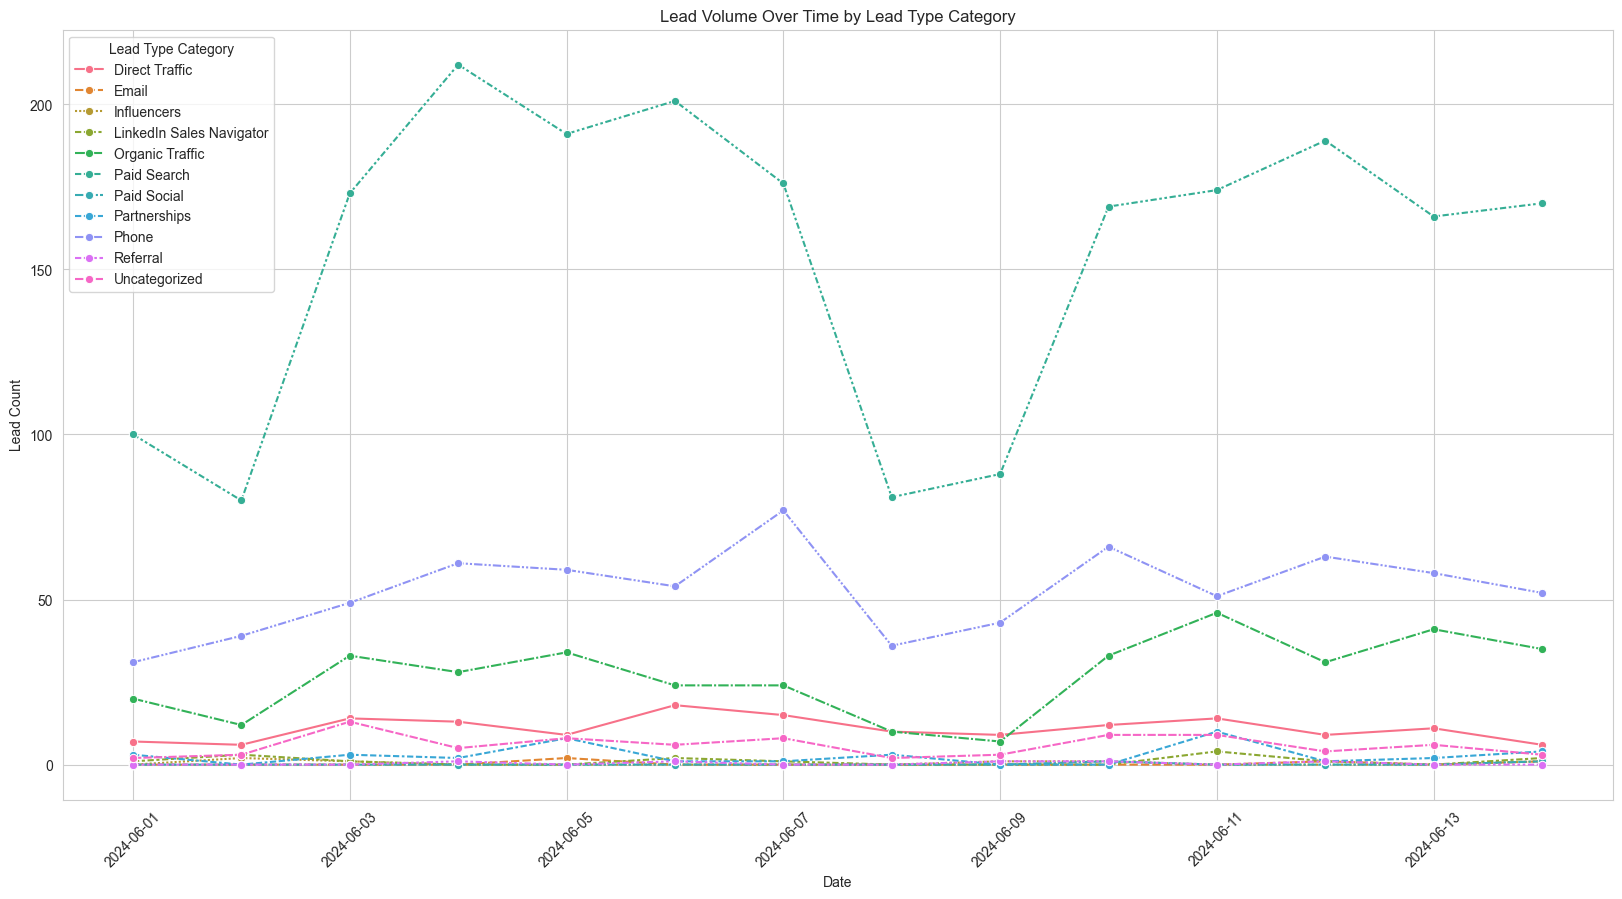

In [203]:
# Group by 'Date turned New' and 'Lead Type Category'
lead_trends = data_cleaned.groupby(['Date turned New', 'Lead Type Category']).size().reset_index(name='Lead Count')

# Pivot for easier plotting
lead_trends_pivot = lead_trends.pivot(index='Date turned New', columns='Lead Type Category', values='Lead Count').fillna(0)

# Set style for plots
sns.set_style("whitegrid")

# Plot time series of lead acquisition trends
plt.figure(figsize=(20, 10))
sns.lineplot(data=lead_trends_pivot, marker='o')

plt.title("Lead Volume Over Time by Lead Type Category")
plt.xlabel("Date")
plt.ylabel("Lead Count")
plt.legend(title="Lead Type Category")
plt.xticks(rotation=45)
plt.show()

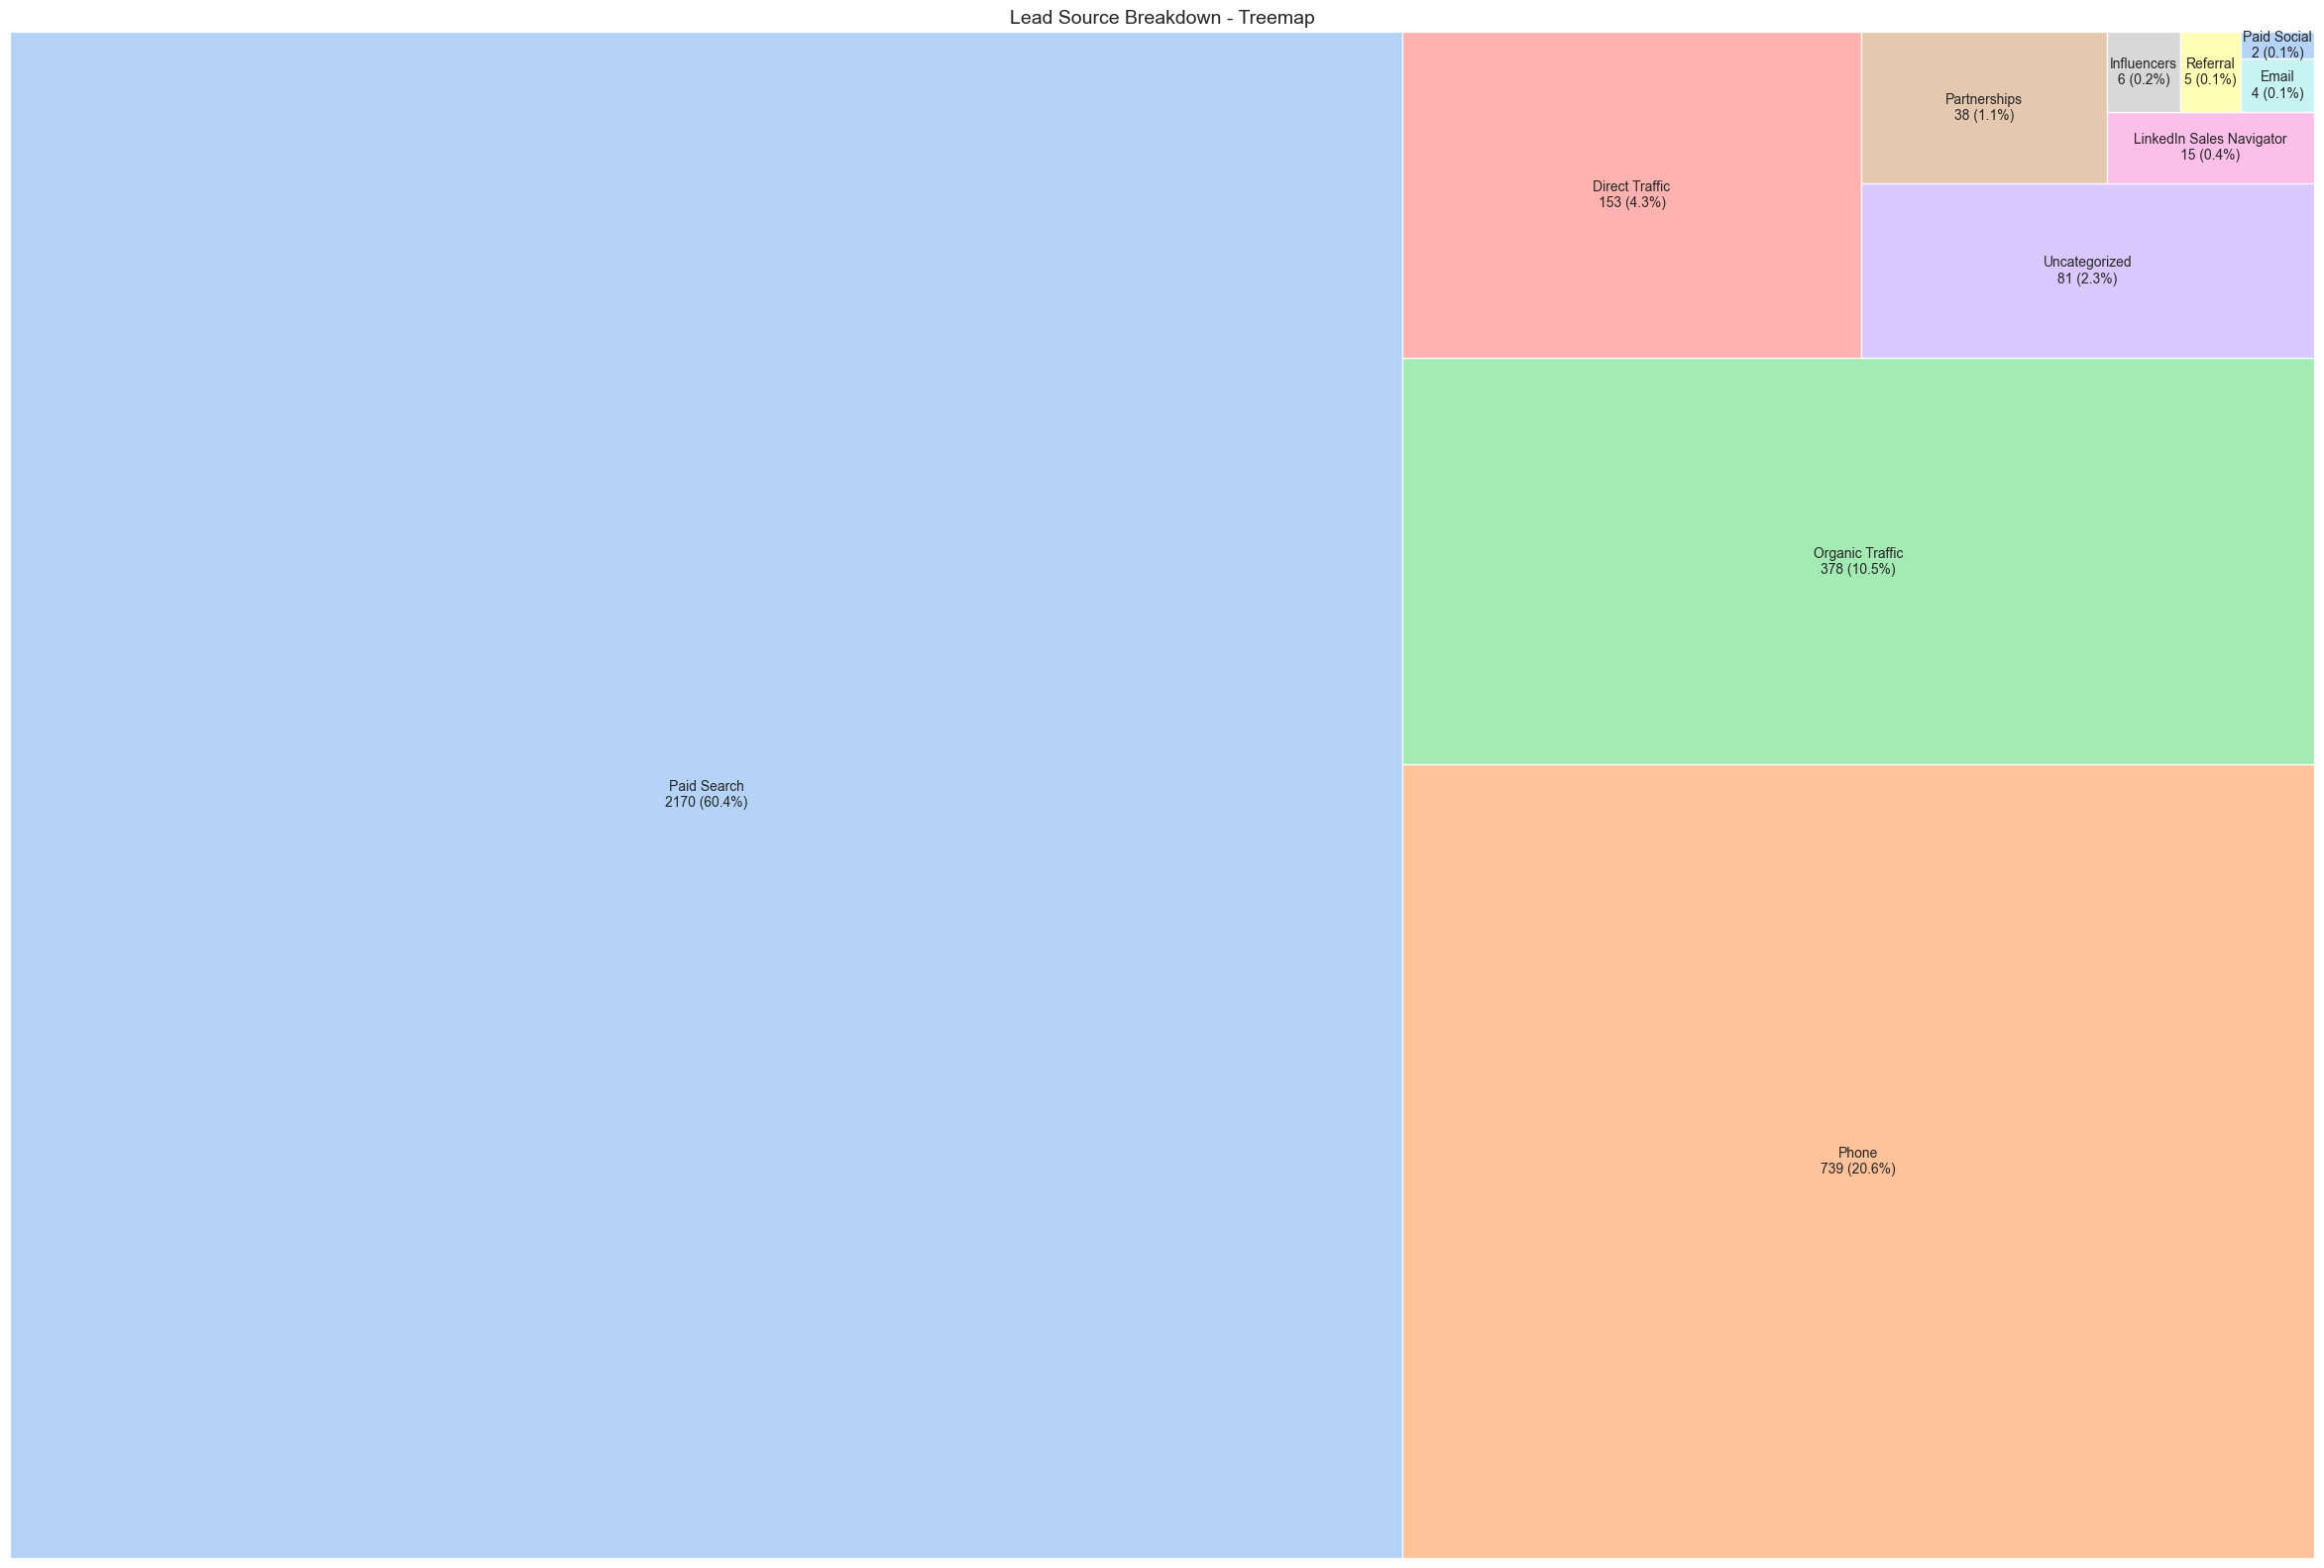

In [210]:
# Aggregate lead source distribution
lead_source_breakdown = data_cleaned['Lead Type Category'].value_counts()

# Calculate percentages
total_leads = lead_source_breakdown.sum()
labels = [f"{cat}\n{val} ({val/total_leads*100:.1f}%)" 
          for cat, val in zip(lead_source_breakdown.index, lead_source_breakdown.values)]

# Define color palette
colors = sns.color_palette("pastel", len(lead_source_breakdown))

# Plot treemap
plt.figure(figsize=(30, 20))
squarify.plot(sizes=lead_source_breakdown.values, 
              label=labels, 
              alpha=0.8, 
              color=colors, 
              text_kwargs={'fontsize': 10})

# Title and formatting
plt.title("Lead Source Breakdown - Treemap", fontsize=14)
plt.axis("off")  # Hide axes
plt.show()


In [220]:
# Ensure 'ARR At Conversion' is numeric, coercing errors to NaN
data_cleaned['Arr At Conversion'] = pd.to_numeric(data_cleaned['Arr At Conversion'], errors='coerce')

# Filter leads where 'Lead Type Category' is 'Paid Search'
paid_search_leads = data_cleaned[data_cleaned['Lead Type Category'] == 'Paid Search']

# Sum ARR at Conversion for Paid Search leads
paid_search_arr = paid_search_leads['Arr At Conversion'].sum()

# Sum ARR at Conversion for all leads
total_arr = data_cleaned['Arr At Conversion'].sum()

# Calculate the contribution percentage of Paid Search
paid_search_contribution = (paid_search_arr / total_arr) * 100

print(f"Paid Search contributes {paid_search_contribution:.2f}% to Arr At Conversion.")
print(f"Paid Search Total {paid_search_arr:.2f}  Arr At Conversion.")

Paid Search contributes 53.24% to Arr At Conversion.
Paid Search Total 74975.40  Arr At Conversion.


### **🔄 Funnel Performance & Conversion Rates**  
- Analyze **conversion rates** across the stages: **Signup → MQL → Demo → Paid**.  
- Identify **bottlenecks** and measure **average time per stage**.  
- **Charts:** Funnel Chart  

In [228]:
# Count leads at each stage
total_signups = data_cleaned['Date turned New'].notna().sum()
total_mqls = data_cleaned['Date turned MQL'].notna().sum()

# Count leads with Demo Date and Paid Date
total_demos = data_cleaned['Date turned Meeting Scheduled/Demo'].notna().sum()

# Leads that are MQLs but have no demo date but do have a SQL (paid) date
total_paid = data_cleaned['Date turned SQL'].notna().sum()

# Calculate the Demo → Paid rate considering that the demo must have a paid date
# Filter the data to count only those demos that have both a Demo and Paid conversion
demos_with_paid = data_cleaned[
    (data_cleaned['Date turned Meeting Scheduled/Demo'].notna()) & 
    (data_cleaned['Date turned SQL'].notna())
]

# Calculate conversion rates
mql_rate = total_mqls / total_signups * 100 if total_signups else 0
demo_rate = total_demos / total_mqls * 100 if total_mqls else 0
paid_rate = total_paid / total_demos * 100 if total_demos else 0
mql_to_paid_rate = total_paid / total_mqls * 100 if total_mqls else 0  # MQL → Paid conversion rate

# Corrected Demo → Paid conversion rate
demo_to_paid_rate = len(demos_with_paid) / total_demos * 100 if total_demos else 0

# Display results
conversion_rates = {
    "Signup → MQL": f"{mql_rate:.2f}%",
    "MQL → Demo": f"{demo_rate:.2f}%",
    "Demo → Paid": f"{demo_to_paid_rate:.2f}%",  # Corrected Demo → Paid rate
    "MQL → Paid": f"{mql_to_paid_rate:.2f}%"  # MQL → Paid rate
}

print("Conversion Rates:")
print(conversion_rates)

Conversion Rates:
{'Signup → MQL': '36.26%', 'MQL → Demo': '30.11%', 'Demo → Paid': '50.51%', 'MQL → Paid': '35.02%'}


In [229]:
# Ensure date columns are in datetime format
date_cols = [
    'Date turned New', 
    'Date turned MQL', 
    'Date turned Meeting Scheduled/Demo', 
    'Date turned SQL'
]

data_cleaned[date_cols] = data_cleaned[date_cols].apply(pd.to_datetime, errors='coerce')

# Calculate time differences between the stages
# We handle cases where a stage might be missing (i.e., skipping demo and going straight to paid)
data_cleaned['Time Signup → MQL'] = (data_cleaned['Date turned MQL'] - data_cleaned['Date turned New']).dt.days
data_cleaned['Time MQL → Demo'] = (data_cleaned['Date turned Meeting Scheduled/Demo'] - data_cleaned['Date turned MQL']).dt.days
data_cleaned['Time Demo → Paid'] = (data_cleaned['Date turned SQL'] - data_cleaned['Date turned Meeting Scheduled/Demo']).dt.days

# For cases where Demo was skipped (i.e., MQL → Paid without Demo), set 'Time Demo → Paid' to the time from MQL to Paid
data_cleaned['Time MQL → Paid'] = data_cleaned['Time Demo → Paid'].where(data_cleaned['Date turned Meeting Scheduled/Demo'].notna(), 
                                                                      (data_cleaned['Date turned SQL'] - data_cleaned['Date turned MQL']).dt.days)

# Compute average time per stage
avg_time_per_stage = data_cleaned[['Time Signup → MQL', 'Time MQL → Demo', 'Time Demo → Paid', 'Time MQL → Paid']].mean().round(2)

print("Average Time Per Stage (Days):")
print(avg_time_per_stage)

Average Time Per Stage (Days):
Time Signup → MQL     2.04
Time MQL → Demo       3.45
Time Demo → Paid     11.64
Time MQL → Paid      17.06
dtype: float64


In [230]:
import plotly.graph_objects as go

# Count leads at each stage with updated column names
total_signups = data_cleaned['Date turned New'].notna().sum()
total_mqls = data_cleaned['Date turned MQL'].notna().sum()
total_demos = data_cleaned['Date turned Meeting Scheduled/Demo'].notna().sum()
total_paid = data_cleaned['Date turned SQL'].notna().sum()

# Calculate conversion rates
mql_rate = total_mqls / total_signups * 100 if total_signups else 0
demo_rate = total_demos / total_mqls * 100 if total_mqls else 0
paid_rate = total_paid / total_demos * 100 if total_demos else 0

# Define funnel values
stages = ['Signup', 'MQL', 'Demo', 'Paid']
values = [total_signups, total_mqls, total_demos, total_paid]

# Create funnel chart
fig = go.Figure(go.Funnel(
    y=stages,
    x=values,
    textinfo="value+percent initial"
))

fig.update_layout(title="Lead Funnel Performance")
fig.show()

Explanation of chart:

**% of Initial:**

This shows the percentage of the original (initial) total value. It's calculated as the value at the current stage divided by the value at the first stage (i.e., Signups).

**% of Previous:**

This shows the percentage relative to the immediately preceding stage in the funnel. It's calculated as the value at the current stage divided by the value of the previous stage.

**% of Total:**

This shows the percentage relative to the total value across all stages (the total number of leads that entered the funnel). It’s calculated as the value at the current stage divided by the sum of values across all stages.

### **🏢 Industry & Company Size Breakdown**  
- Identify **top-performing industries** and their conversion rates.  
- Analyze how **company size** impacts lead conversion.  
- **Charts:** Industry vs. Conversion Rate, Employee Count Breakdown.  

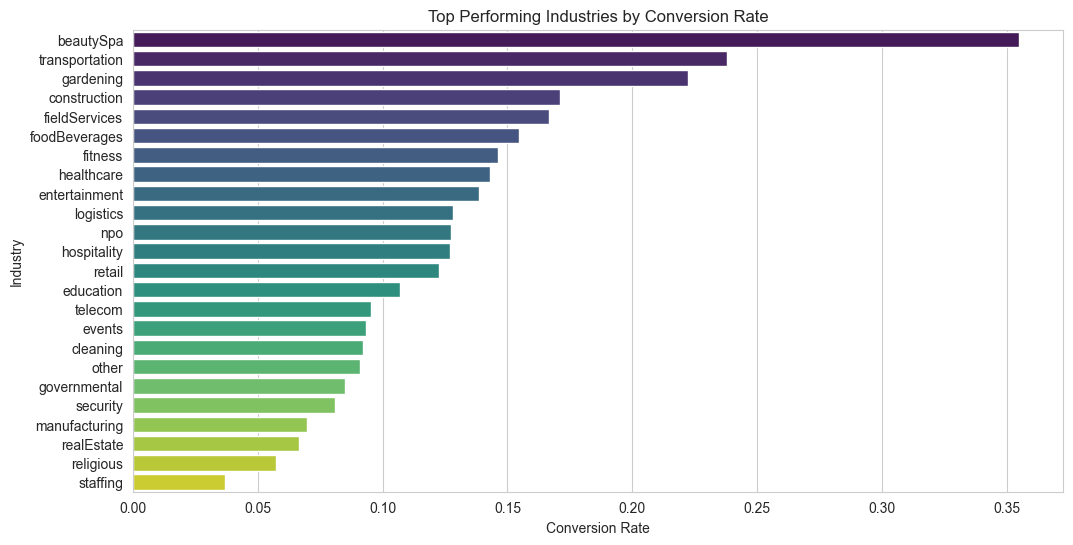

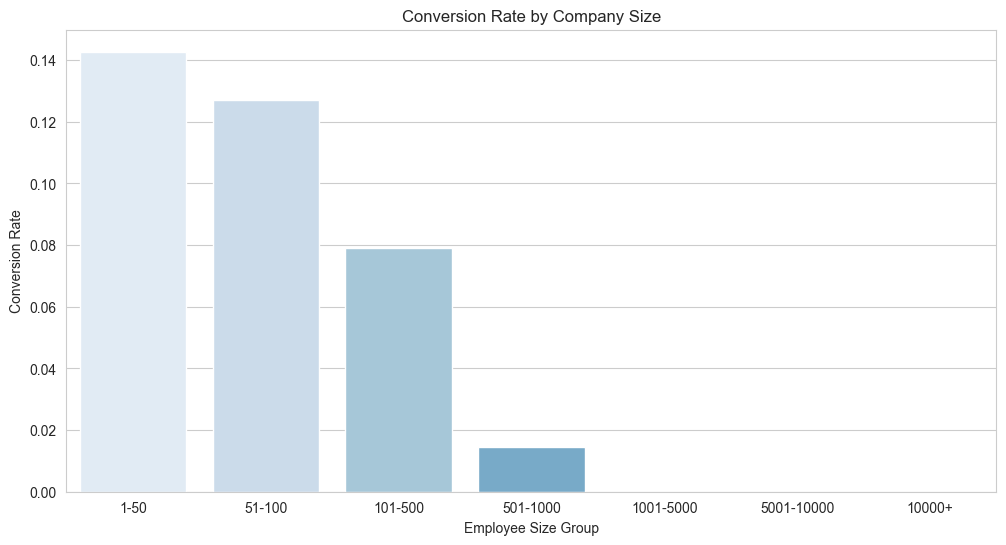

In [ ]:
# Ensure 'Num of Employees' is a numeric column (it may be read as a string)
data_cleaned['Num of Employees'] = pd.to_numeric(data_cleaned['Num of Employees'], errors='coerce')

# 1. Calculate conversion rates by industry
industry_conversion_rate = data_cleaned.groupby('Industry').apply(
    lambda x: x['Conversion to Paid Timestamp Date'].notna().sum() / x['Signup Timestamp Date'].notna().sum()
).reset_index(name='Conversion Rate')

# Sort by conversion rate for top-performing industries
industry_conversion_rate = industry_conversion_rate.sort_values(by='Conversion Rate', ascending=False)

# Plot Industry vs Conversion Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Conversion Rate', y='Industry', data=industry_conversion_rate, palette='viridis')
plt.title("Top Performing Industries by Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Industry")
plt.show()

# 2. Analyze company size impact (Employee Count vs Conversion Rate)
# First, create bins for company sizes
size_bins = [0, 50, 100, 500, 1000, 5000, 10000, float('inf')]
size_labels = ['1-50', '51-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10000+']
data_cleaned['Employee Size Group'] = pd.cut(data_cleaned['Num of Employees'], bins=size_bins, labels=size_labels)

# Calculate conversion rates by employee size
employee_size_conversion_rate = data_cleaned.groupby('Employee Size Group').apply(
    lambda x: x['Conversion to Paid Timestamp Date'].notna().sum() / x['Signup Timestamp Date'].notna().sum()
).reset_index(name='Conversion Rate')

# Plot Employee Size Breakdown
plt.figure(figsize=(12, 6))
sns.barplot(x='Employee Size Group', y='Conversion Rate', data=employee_size_conversion_rate, palette='Blues')
plt.title("Conversion Rate by Company Size")
plt.xlabel("Employee Size Group")
plt.ylabel("Conversion Rate")
plt.show()

**Note Regarding Employee Size Group and conversion rate.**

Only 2 leads with employee sizess of 3000 out of 134 leads with 3000 employees converted to paid.

### **💰 ARR & Revenue Impact**  
- Examine **ARR distribution** across lead segments.  
- Detect correlation between **deal size and conversion time**.  
- **Charts:** Histogram (ARR Distribution), Scatter Plot (ARR vs. Conversion Time). 

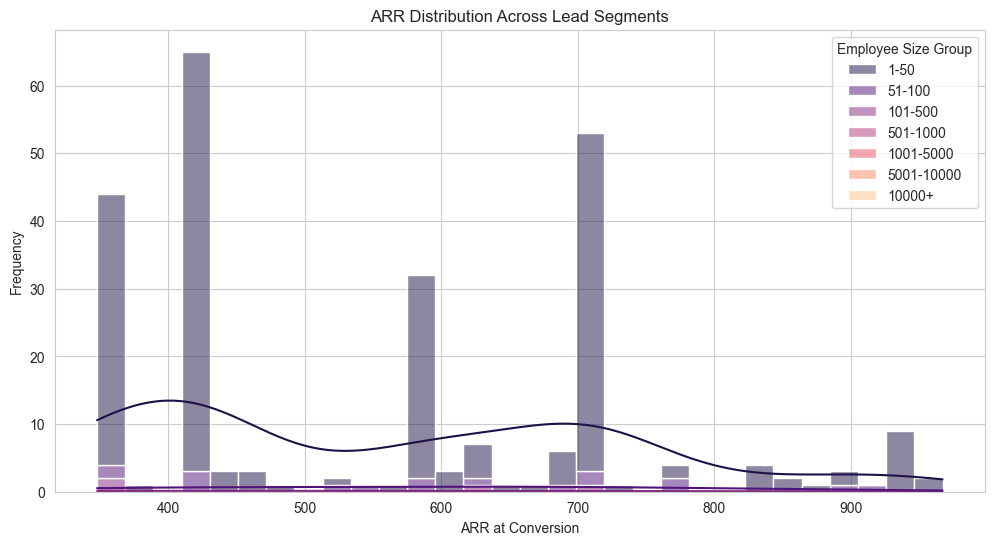

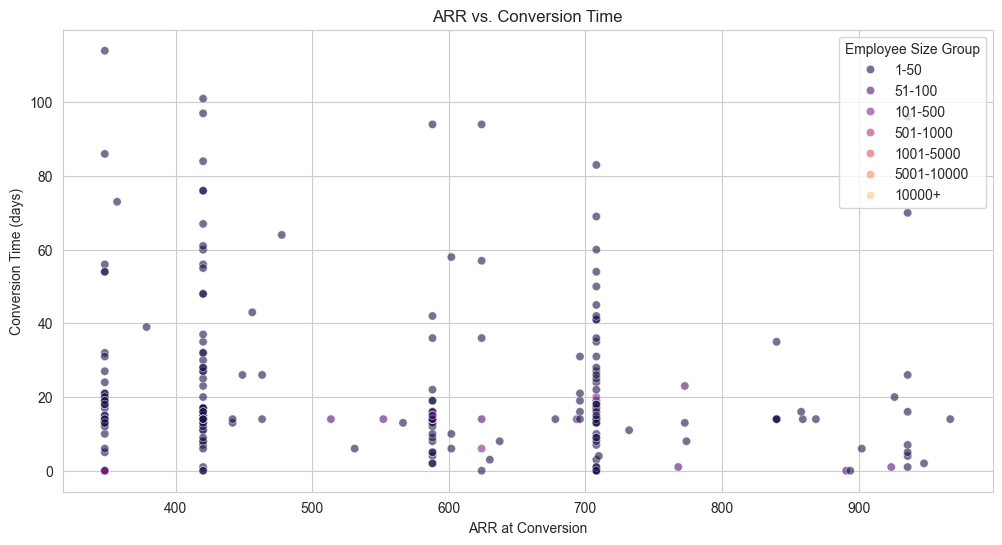

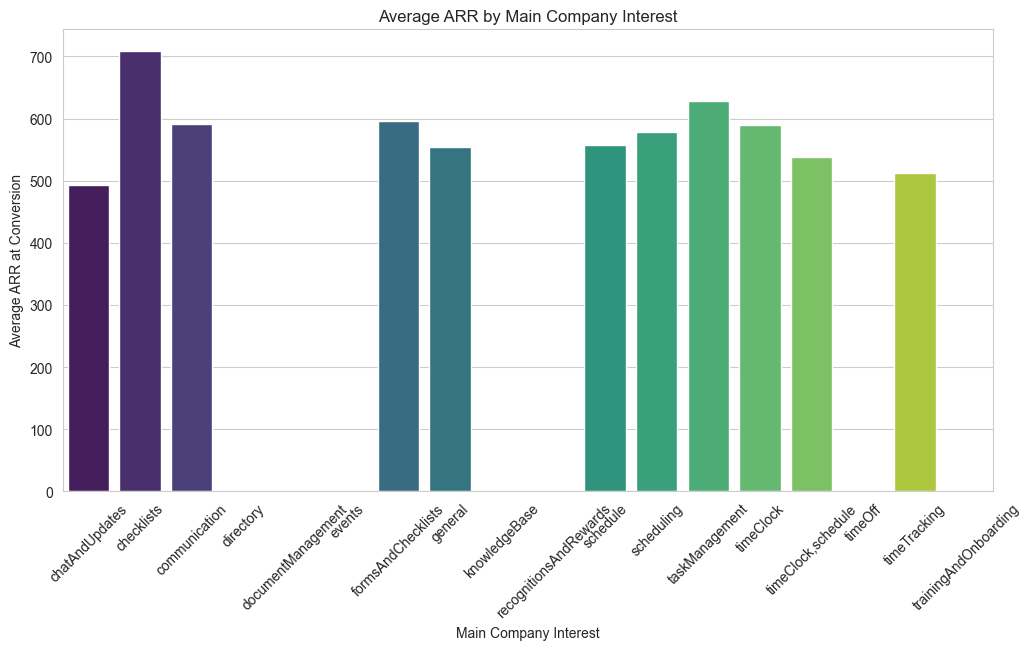

Correlation between ARR and Conversion Time: -0.10688481026242498


In [ ]:
# Ensure ARR is numeric (if needed)
data_cleaned['Arr At Conversion'] = pd.to_numeric(data_cleaned['Arr At Conversion'], errors='coerce')

# 1. ARR Distribution by Lead Segment
# First, define segments based on your lead characteristics, e.g., industry or employee size
# For simplicity, using 'Employee Size Group' as the lead segment

# Plot ARR Distribution by Lead Segment
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned, x='Arr At Conversion', hue='Employee Size Group', multiple="stack", kde=True, palette='magma', bins=30)
plt.title("ARR Distribution Across Lead Segments")
plt.xlabel("ARR at Conversion")
plt.ylabel("Frequency")
plt.show()

# 2. Correlation Between Deal Size (ARR) and Conversion Time
# Calculate conversion time (time taken to convert to paid) 
# Assuming 'Signup Timestamp Date' and 'Conversion to Paid Timestamp Date' are datetime columns

data_cleaned['Conversion Time (days)'] = (data_cleaned['Conversion to Paid Timestamp Date'] - data_cleaned['Signup Timestamp Date']).dt.days

# Scatter plot to show the relationship between ARR and Conversion Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Arr At Conversion', y='Conversion Time (days)', data=data_cleaned, hue='Employee Size Group', palette='magma', alpha=0.6)
plt.title("ARR vs. Conversion Time")
plt.xlabel("ARR at Conversion")
plt.ylabel("Conversion Time (days)")
plt.show()

# 3. Shows average ARR per company interest
# Aggregate ARR by Main Company Interest
arr_by_interest = data_cleaned.groupby('Main Company Interest')['Arr At Conversion'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=arr_by_interest, x='Main Company Interest', y='Arr At Conversion', palette='viridis')
plt.xticks(rotation=45)
plt.title("Average ARR by Main Company Interest")
plt.xlabel("Main Company Interest")
plt.ylabel("Average ARR at Conversion")
plt.show()


# Correlation between ARR and Conversion Time
correlation = data_cleaned[['Arr At Conversion', 'Conversion Time (days)']].corr().iloc[0, 1]
print(f"Correlation between ARR and Conversion Time: {correlation}")

### Correlation Between ARR and Conversion Time

The correlation value of **-0.107** means there is a slight negative correlation between **ARR** (Annual Recurring Revenue) and **Conversion Time** (the time it takes for a lead to convert to a paid customer).

#### Here's what that implies:

- **Negative Correlation**: As one variable increases, the other tends to decrease. In this case, as ARR increases, the time it takes for leads to convert (Conversion Time) tends to decrease, although this relationship is weak.

- **Magnitude of the Correlation**: The value of **-0.107** is very close to 0, which indicates a **weak** relationship between ARR and Conversion Time. The closer the correlation value is to -1 or 1, the stronger the relationship. Since it's closer to 0, it suggests that ARR and Conversion Time don't have a strong linear relationship.

#### In simple terms:
There is a slight tendency for larger deals (higher ARR) to convert slightly faster, but the correlation is weak enough that it's not a major pattern in the data.

### **🌍 Regional Performance**  
- Compare **lead volume and conversion rates** across different countries/regions.  
- Assess **regional variations in sales cycles**.  
- **Charts:** Heatmap (Leads & Conversions), Region vs. Conversion Rate.  

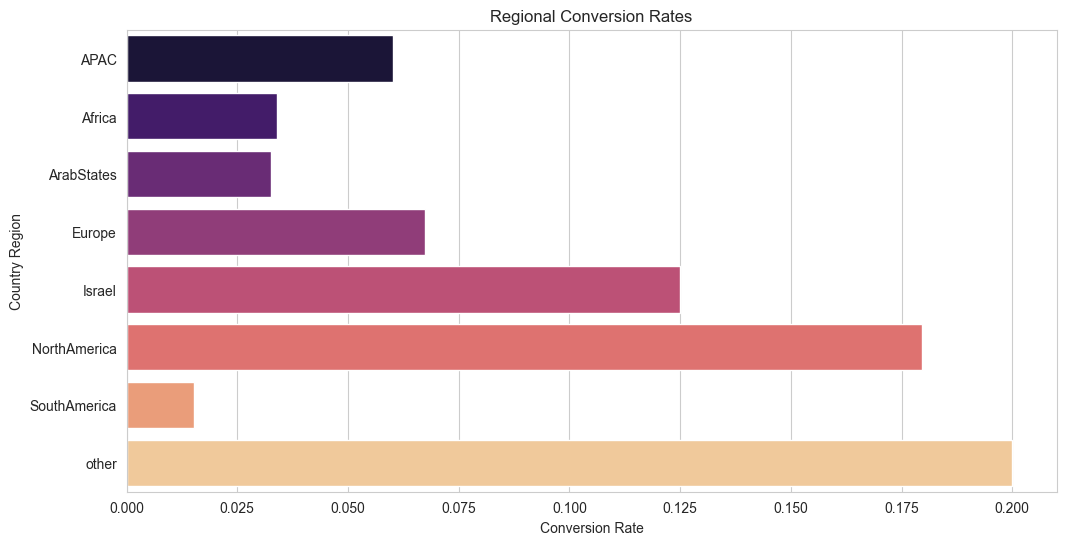

In [ ]:
# 1. **Leads and Conversions by Region** - Heatmap (Leads & Conversions)

# Pivot the data to create a table of leads and conversions by region and country
leads_conversions_by_region = data_cleaned.pivot_table(
    index='Country Region', columns='Country', values=['Signup Timestamp Date', 'Conversion to Paid Timestamp Date'], 
    aggfunc='count', fill_value=0
)
import plotly.express as px

# Aggregate leads by country
country_lead_volume = data_cleaned.groupby('Country')['Signup Timestamp Date'].count().reset_index()
country_lead_volume.columns = ['Country', 'Lead Volume']

# Plot Choropleth Map
fig = px.choropleth(
    country_lead_volume, locations="Country", locationmode="country names",
    color="Lead Volume", hover_name="Country", color_continuous_scale="viridis"
)
fig.update_layout(title="Lead Volume by Country")
fig.show()


# 2. **Regional Conversion Rates** - Region vs. Conversion Rate

# Calculate conversion rate for each region
region_conversion_rate = data_cleaned.groupby('Country Region').apply(
    lambda x: x['Conversion to Paid Timestamp Date'].notna().sum() / x['Signup Timestamp Date'].notna().sum()
).reset_index(name='Conversion Rate')

# Plotting Region vs. Conversion Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Conversion Rate', y='Country Region', data=region_conversion_rate, palette='magma')  # Using 'magma' for vibrant color
plt.title("Regional Conversion Rates")
plt.xlabel("Conversion Rate")
plt.ylabel("Country Region")
plt.show()
